<a href="https://colab.research.google.com/github/NollyKeyz/NLP/blob/main/Knowledge_of_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
** **
Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

- **Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
- **Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight
- **Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

In this workshop, we’ll take a closer look at LDA, and implement our first topic model using the sklearn implementation

### Theoretical Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

![LDA_Model](https://github.com/chdoig/pytexas2015-topic-modeling/blob/master/images/lda-4.png?raw=true)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Ali-Alameer/NLP/blob/main/week9_topic_modelling_LDA.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
For this workshop, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

Let’s start by looking at the content of the file

** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **

In [3]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.23.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [4]:
# Importing modules
import pandas as pd
import os

Read the dataset automatically from the github repository

In [5]:
from io import BytesIO
from zipfile import ZipFile
import urllib.request

url = urllib.request.urlopen("https://github.com/Ali-Alameer/NLP/raw/main/data/NIPS%20Papers.zip")

with ZipFile(BytesIO(url.read())) as my_zip_file:
    temp = my_zip_file.open('NIPS Papers/papers.csv')

papers = pd.read_csv(temp)

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Read data into papers, the file can be downloaded from https://github.com/Ali-Alameer/NLP/raw/main/data/NIPS%20Papers.zip

In [ ]:
# uncomment below if you have the csv file in your directory

# papers = pd.read_csv('papers.csv')

In [ ]:
# uncomment below if you have the xls file in your directory

# !pip install --upgrade xlrd
# papers = pd.read_excel('savedrecs.xls')

In [7]:
# Print head
papers.head()
papers.head(0)

,id,year,title,event_type,pdf_name,abstract,paper_text


In [6]:
papers.describe(include='all')

,id,year,title,event_type,pdf_name,abstract,paper_text
count,6560.000000,6560.000000,6560,1741,6560,6560,6560
unique,NaN,NaN,6560,3,6560,3244,6553
top,NaN,NaN,Self-Organization of Associative Database and ...,Poster,1-self-organization-of-associative-database-an...,Abstract Missing,Dialog-based Language Learning\n\nJason Weston...
freq,NaN,NaN,1,1505,1,3317,2
mean,3314.574238,2005.343750,NaN,NaN,NaN,NaN,NaN
std,1901.990197,8.481128,NaN,NaN,NaN,NaN,NaN
min,1.000000,1987.000000,NaN,NaN,NaN,NaN,NaN
25%,1675.750000,1999.000000,NaN,NaN,NaN,NaN,NaN
50%,3318.500000,2007.000000,NaN,NaN,NaN,NaN,NaN
75%,4959.250000,2013.000000,NaN,NaN,NaN,NaN,NaN


** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 100 papers


After completion, try and sample more papers and look at the results


In [8]:
print(papers.head(0))

Empty DataFrame
Columns: [id, year, title, event_type, pdf_name, abstract, paper_text]
Index: []


In [9]:
# Remove columns that does not relate to the task and select only the 100 sample for quick implementation
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2098,2005,"Divergences, surrogate loss functions and expe...",Abstract Missing,"Divergences, surrogate loss functions and\nexp..."
2766,2008,Learning to Use Working Memory in Partially Ob...,Working memory is a central topic of cognitive...,Learning to use Working Memory in Partially\nO...
1784,2004,Learning Efficient Auditory Codes Using Spikes...,Abstract Missing,Learning efficient auditory codes using spikes...
3040,2009,Nash Equilibria of Static Prediction Games,The standard assumption of identically distrib...,Nash Equilibria of Static Prediction Games\n\n...
4383,2013,Approximate Gaussian process inference for the...,We introduce a nonparametric approach for esti...,Approximate Gaussian process inference for the...


In [10]:
papers.shape

(100, 4)

##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [11]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

2098    divergences surrogate loss functions and\nexpe...
2766    learning to use working memory in partially\no...
1784    learning efficient auditory codes using spikes...
3040    nash equilibria of static prediction games\n\n...
4383    approximate gaussian process inference for the...
Name: paper_text_processed, dtype: object

Example on re.sub -- uncomment and try different characters

In [ ]:
a = 'cat is?'
b = re.sub('[,\.!?]', 'L', a)

** **
#### Step 3: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.



The join() method takes all items in an iterable and joins them into one string. A string must be specified as the separator. uncomment the below to see example

In [12]:
myTuple = ("John", "Peter", "Vicky")
x = " is good\n".join(myTuple)
print(x)

John is good
Peter is good
Vicky


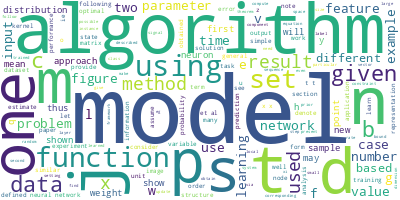

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

** **
#### Step 4: Prepare text for LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

Generate Similar (gensim):
What is Gensim? Gensim = “Generate Similar” is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as − Building document or word vectors.

NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc

In [14]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['divergences', 'surrogate', 'loss', 'functions', 'experimental', 'design', 'xuanlong', 'nguyen', 'university', 'california', 'berkeley', 'ca', 'xuanlong', 'csberkeleyedu', 'martin', 'wainwright', 'university', 'california', 'berkeley', 'ca', 'wainwrig', 'eecsberkeleyedu', 'michael', 'jordan', 'university', 'california', 'berkeley', 'ca', 'jordan', 'csberkeleyedu']


In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 3), (14, 2), (15, 3), (16, 12), (17, 3), (18, 1), (19, 4), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 4), (29, 3)]


** **
#### Step 5: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [16]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"learning" + 0.006*"model" + 0.006*"data" + 0.005*"function" + '
  '0.005*"set" + 0.004*"neural" + 0.004*"algorithm" + 0.004*"time" + '
  '0.004*"network" + 0.004*"input"'),
 (1,
  '0.007*"data" + 0.007*"learning" + 0.006*"function" + 0.006*"model" + '
  '0.004*"used" + 0.004*"given" + 0.004*"using" + 0.004*"set" + '
  '0.004*"algorithm" + 0.004*"one"'),
 (2,
  '0.008*"data" + 0.007*"learning" + 0.007*"model" + 0.006*"function" + '
  '0.005*"set" + 0.005*"one" + 0.005*"algorithm" + 0.004*"time" + '
  '0.003*"problem" + 0.003*"models"'),
 (3,
  '0.007*"model" + 0.006*"data" + 0.006*"learning" + 0.005*"time" + '
  '0.004*"algorithm" + 0.004*"function" + 0.003*"set" + 0.003*"problem" + '
  '0.003*"functions" + 0.003*"using"'),
 (4,
  '0.012*"model" + 0.005*"network" + 0.005*"set" + 0.005*"learning" + '
  '0.004*"algorithm" + 0.004*"time" + 0.004*"function" + 0.004*"data" + '
  '0.003*"input" + 0.003*"figure"'),
 (5,
  '0.009*"learning" + 0.008*"model" + 0.006*"function" + 0.

** **
#### Step 6: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [17]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.007069  0.008164       1        1  27.098264
9     -0.001563 -0.002226       2        1  15.026794
4     -0.009264 -0.001543       3        1  12.325744
0     -0.004544  0.000575       4        1  10.339546
2      0.000010  0.002327       5        1   9.622216
3     -0.000439 -0.003841       6        1   7.537013
6      0.009888 -0.005797       7        1   6.238879
5     -0.005250  0.003910       8        1   5.360262
8      0.003859  0.001000       9        1   4.702741
7      0.000234 -0.002569      10        1   1.748541, topic_info=          Term         Freq        Total Category  logprob  loglift
245   function  1162.000000  1162.000000  Default  30.0000  30.0000
134       data  1318.000000  1318.000000  Default  29.0000  29.0000
323   learning  1466.000000  1466.000000  Default  28.0000  28.0000
1092     model  1559.000000  1559.000000  Default  27.0000  27.0000
547        set   923.000000   923.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
637       used     8.783043   661.312638  Topic10  -6.0920  -0.2750
1645     input     8.306460   570.347047  Topic10  -6.1478  -0.1828
1389  training     8.176375   611.688130  Topic10  -6.1636  -0.2686
623        two     8.055869   654.232098  Topic10  -6.1785  -0.3507
369     method     7.777886   478.878549  Topic10  -6.2136  -0.0738

[855 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
14285      4  0.291131         aaba
14285      6  0.291131         aaba
1444       1  0.240561  abstraction
1444       2  0.160374  abstraction
1444       3  0.080187  abstraction
...      ...       ...          ...
4659       6  0.053095           zk
4659       7  0.026548           zk
4659       8  0.079643           zk
4659       9  0.026548           zk
4659      10  0.026548           zk

[3606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 5, 1, 3, 4, 7, 6, 9, 8])

** **
#### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this notebook addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### References:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
